---
# 도서관 타겟 정보 전처리
---

## 데이터 호출

In [25]:
import pandas as pd
import re
events_df = pd.read_csv('./output/event_info.csv')
events_df

,event_link,event_info,lib_name,events_num,events_place,events_period,events_time,events_target,events_price,events_q,events_dummies,start_date,end_date
0,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 7월 문화가 있는 영화관 영화상영안내\n2024-07-27 ~...,구립증산정보도서관,0,2층 소강당,2024-07-27 ~ 2024-07-27,14:00~16:00,도서관 이용자,무료,02-307-6030,7월 문화가 있는 영화관 영화상영안내\n 7월27일 토요일 오후 2시 영화...,2024-07-27,2024-07-27
1,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 2024 움직이는 책방(이동형 서울형 책방) 4회 : 콕콕콕\n202...,서울도서관,1,서울도서관 1층 생각마루,2024-07-27 ~ 2024-07-27,17:00-19:00,누구나(어른+아이 1팀으로 구성),무료,070-5413-5661,움직이는 책방(이동형 서울형 책방)에서\n우리동네 서울형 책방의 다채로운 문화행...,2024-07-27,2024-07-27
2,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 서울 문화의 밤(7월) 행사 - 신병주 작가와의 만남\n2024-07...,서울도서관,2,서울도서관 1층 생각마루,2024-07-26 ~ 2024-07-26,19:00 ~ 20:30,서울도서관 회원,무료,02-2133-0248,서울도서관 7월 마지막주 「서울 문화의 밤」 행사로 《서울의 자서전》 신병주 작가와...,2024-07-26,2024-07-26
3,https://culture.seoul.go.kr/culture/culture/cu...,"[마포구립서강도서관][7월/팟캐스트] 서강도서관 피셜 47회 [일주일에 세 번, 동...",마포구립서강도서관,3,온라인,2024-07-26 ~ 2024-08-20,09:00 ~ 18:00,누구나,무료,02-3141-7053,"서강도서관피셜 마흔 일곱 번째 시간\n정경아 작가의 <일주일에 세 번, 동네문화...",2024-07-26,2024-08-20
4,https://culture.seoul.go.kr/culture/culture/cu...,[서초구립내곡도서관] 내곡도서관에서 여름을 즐기세요!\n2024-07-26 ~ 20...,서초구립내곡도서관,4,서초구립내곡도서관,2024-07-26 ~ 2024-08-31,프로그램 별 상이 / 내곡도서관 매 주 월요일 휴관,유아·어린이,"원데이베이킹 재료비 15,000원",02-3461-3072,SUMMER BREAK WITH LIBRARY & 도서관에서 여름나기 \n ...,2024-07-26,2024-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관]_[유아 독서동아리 모집] 책&별(책읽는 미래의 별)\n2021...,강남구립청담도서관,941,ZOOM 실시간 화상 강의,2021-03-25 ~ 2022-02-24,16:00~16:40,"미취학 아동 6~7세, 10명",없음,540-7042,NaN,2021-03-25,2022-02-24
942,https://culture.seoul.go.kr/culture/culture/cu...,국립중앙도서관 실감서재\n2021-03-23 ~ 2022-12-31\n국립중앙도서관...,국립중앙도서관 실감서재\n2021-03-23 ~ 2022-12-31\n국립중앙도서관...,942,국립중앙도서관 디지털도서관 지하 3층 실감서재,2021-03-23 ~ 2022-12-31,10:00 ~ 17:00 (회차당 50분),전 연령층 [유아 및 어린이(만 12세 이하)는 성인 보호자 동반 필수],무료,NaN,"실감나는 콘텐츠, 체험하는 도서관!\n『실감서재』는 첨단 기술이 적용된 새로운 형태...",2021-03-23,2022-12-31
943,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관] _[초등 독서동아리 모집] 책퐁(책속으로 퐁당)\n2021-0...,강남구립청담도서관,943,ZOOM 실시간 화상 수업,2021-03-14 ~ 2022-02-13,11:00~12:00,2021년 기준 초등학생 1~2학년,없음,540-7042,NaN,2021-03-14,2022-02-13
944,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관] _[초등 독서동아리 모집] 마따동(마음이 따뜻해지는 동화)\n...,강남구립청담도서관,944,ZOOM 실시간 화상 수업,2021-03-14 ~ 2022-02-13,매월 둘째 주 일요일 (16:00~17:00),2021년 기준 초등학생 3~4학년,없음,540-7042,NaN,2021-03-14,2022-02-13


## 데이터 기간 필터링

In [26]:
mask = (events_df['start_date'] >= '2023-01-01') & (events_df['start_date'] <= '2023-12-31')
filtered_events = events_df[mask]
filtered_events

,event_link,event_info,lib_name,events_num,events_place,events_period,events_time,events_target,events_price,events_q,events_dummies,start_date,end_date
325,https://culture.seoul.go.kr/culture/culture/cu...,[마포구립서강도서관] 12-1월 세대교류 그림책 독서모임\n2023-12-28 ~ ...,마포구립서강도서관,325,서강도서관 3층 Book C,2023-12-28 ~ 2024-01-18,매주 목요일 19:00~12:00/ 4회 - 매주 토요일 14:00~16:00/ 3회,"청년(만19세~34세) 6명, 중년(만48세~60세) 6명",무료,02-3141-7053,2023~2024년 세대교류 그림책 독서모임 \n\n\n\n1. 프로그램명: 20...,2023-12-28,2024-01-18
326,https://culture.seoul.go.kr/culture/culture/cu...,"[마포구립서강도서관] 12월 팟캐스트 피셜 41회 [설자은, 금성으로 돌아오다]\n...",마포구립서강도서관,326,팟빵(팟캐스트),2023-12-28 ~ 2024-01-31,언제나,누구나,무료,02-3141-7053,"12월 팟캐스트 피셜 41회 설자은, 금성으로 돌아오다 \n\n정세랑 작가의 <설...",2023-12-28,2024-01-31
327,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 어린이 직업탐색 네 꿈을 찾아봐! 12월 - 인테리어 디자이너...,구립증산정보도서관,327,3층 어린이열람실,2023-12-27 ~ 2023-12-27,2023년 12월 27일(수) 오후 3시 ~ 5시,어린이 이용자 누구나 (24명),무료,02-307-6030,12월 어린이 직업탐색 네 꿈을 찾아봐! 인테리어 디자이너 \n\n매월 마지막 주...,2023-12-27,2023-12-27
328,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 사서 선생님과 함께하는 [두근두근 크리스마스 준비!]\n202...,구립증산정보도서관,328,지하 1층 문화강좌실,2023-12-21 ~ 2023-12-21,2023.12.21.(목) 오후 4시~5시,4~5세 유아 10명 (부모 동반 가능),무료,02-307-6030,사서 선생님과 함께하는 두근두근 크리스마스 준비! \n\n코앞으로 다가온 크리스마...,2023-12-21,2023-12-21
329,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 민들레씨 그림책 놀이터 [12/20(수) 멍멍댄스]\n2023...,구립증산정보도서관,329,지하 1층 문화강좌실,2023-12-20 ~ 2023-12-20,16:00,6~7세 유아 10명,무료,02-307-6030,민들레씨 그림책 놀이터 멍멍댄스 \n\n우리 도서관에서 진행 된 ＜은평마을 ...,2023-12-20,2023-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 2023 1월 꼬마북클럽 '오늘 해님이 안나온다면'\n2023...,구립증산정보도서관,615,지하 문화강좌실,2023-01-09 ~ 2023-01-16,오후 4시,6~7세 유아 10명,무료,NaN,2023 1월 꼬마북클럽\n오늘 해님이 안 나온다면\n\n대상 _ 6~7세 유아 1...,2023-01-09,2023-01-16
616,https://culture.seoul.go.kr/culture/culture/cu...,[서울애니메이션센터] 도심 속 문화체험공간! 만화도서관 & 애니소풍\n2023-01...,서울애니메이션센터,616,"서울애니메이션센터 1,2층",2023-01-03 ~ 2023-01-31,"만화의집10:00-20:00/애니소풍10:00-18:00(매주 월요일, 기타 지정일...",어린이/청소년/성인,"만화의집(무료) / 유료(애니소풍) 성인 4,000원, 어린이 6,000원",02-3455-8341,1층 만화의집 - 다양한 만화책과 영상을 보유한 만화도서관으로 명동의 새로운 핫플레...,2023-01-03,2023-01-31
617,https://culture.seoul.go.kr/culture/culture/cu...,[구로구립 궁동어린이도서관] 2023 겨울방학 프로그램\n2023-01-02 ~ 2...,구로구립 궁동어린이도서관,617,궁동어린이도서관,2023-01-02 ~ 2023-02-23,10:00-18:00,도서관 이용자,무료,NaN,궁동어린이도서관 2023년 겨울방학 프로그램 전체 안내\n\n그림책과 함께하는 심리...,2023-01-02,2023-02-23
618,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 인스타그램 이벤트 ‘독서할계묘’\n2023-01-02 ~ 20...,구립증산정보도서관,618,도서관 인스타그램,2023-01-02 ~ 2023-01-14,1월 2일(월) ~ 1월 14일(토),도서관 이용자 누구나,무료,NaN,인스타그램 1월 이벤트 \n\n”독서할계묘”\n2023년을 맞이하여 진행하는 독서 ...,2023-01-02,2023-01-14


# 전처리

In [27]:
events_df['events_target'].unique()

array(['도서관 이용자', '누구나(어른+아이 1팀으로 구성)', '서울도서관 회원', '누구나', '유아·어린이',
       '어린이', '성인', '8명 (초등 5-6학년)', '도서관 이용자 누구나', '초등학생 및 어린이 가족',
       '초등 3~4학년 (2014~2015년생, 12명)', '초등학생 어린이 및 가족', '자녀가 있는 부모',
       '전체 (일부 프로그램 제외)', '초등 1~3학년 어린이', '6세~13세, 15명', '초등 3~4학년',
       '일반인', '초등 3~6학년/ 12명', '유아(2018년생 ~ 2020년생), 초등 1 ~ 6학년 및 동반 가족',
       '어린이를 포함한 10가족', '6~8세/ 15명', '누구나 (20명)', '일반 25명', '청소년, 성인',
       '성인(지역 청년 및 직장인)', '일반 30명', '6세~13세', '성인 (15명)', '유아',
       '초등 1~2학년/ 12명', '3~7세 유아 누구나(2018~2022년생)', '초등 1~2학년',
       '누구나 (선착순 80명)', '초등 3~6학년', '초등학교 1~2학년', '성인 (12명)', '지역주민',
       '초등 1-6학년 해봄이(요일별 6명)', '성인 20명', '은평구 주민 누구나(선착순 마감)',
       '초등학생 (은평구공공도서관 정회원)', '성인 누구나', '80명',
       '서울야외도서관 사업에 관심 있는 전국 자치단체 및 민간단체 관계자, 대학 소속 직원 및 학생', '프로그램별 상이',
       '성인 및 청소년', '초등 1~2학년 어린이 12명', '자녀를 둔 부모 및 양육자', '6-7세 유아',
       '초등학교 1~3학년 10명', '유아(2018~2019년생), 초등 1~6학년 및 동반 가족',
       '초등학생 1~3학년 (2015~2017) 15명', '누구나 (30명)', '상세 내용 참고',
      

In [28]:
# targets_list = pd.DataFrame(events_df['events_target'].unique())
# targets_list.to_csv('./output/targets_list.csv',index=False,encoding='utf-8-sig')

In [29]:
# 대분류 성인 어린이 유아 초등학생 누구나 도서관이용자 기타
# 상세분류

In [30]:
target_category = []
for idx,target in enumerate(events_df['events_target']):
    # print(target)
    possible_category = []
    if re.search('누구나|성인|유아|어린이|초등|부모|가족',target) : 
        if re.search('누구나', target) : possible_category.append('누구나')
        if re.search('성인', target) : possible_category.append('성인')
        if re.search('유아', target) : possible_category.append('유아')
        if re.search('어린이', target) : possible_category.append('어린이')
        if re.search('초등', target) : possible_category.append('초등')
        if re.search('부모', target) : possible_category.append('부모')
        if re.search('가족', target) : possible_category.append('가족')
        target_category.append("//".join(possible_category))
    else : target_category.append('수기 확인')

events_df['target_category'] = target_category
events_df

,event_link,event_info,lib_name,events_num,events_place,events_period,events_time,events_target,events_price,events_q,events_dummies,start_date,end_date,target_category
0,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 7월 문화가 있는 영화관 영화상영안내\n2024-07-27 ~...,구립증산정보도서관,0,2층 소강당,2024-07-27 ~ 2024-07-27,14:00~16:00,도서관 이용자,무료,02-307-6030,7월 문화가 있는 영화관 영화상영안내\n 7월27일 토요일 오후 2시 영화...,2024-07-27,2024-07-27,수기 확인
1,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 2024 움직이는 책방(이동형 서울형 책방) 4회 : 콕콕콕\n202...,서울도서관,1,서울도서관 1층 생각마루,2024-07-27 ~ 2024-07-27,17:00-19:00,누구나(어른+아이 1팀으로 구성),무료,070-5413-5661,움직이는 책방(이동형 서울형 책방)에서\n우리동네 서울형 책방의 다채로운 문화행...,2024-07-27,2024-07-27,누구나
2,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 서울 문화의 밤(7월) 행사 - 신병주 작가와의 만남\n2024-07...,서울도서관,2,서울도서관 1층 생각마루,2024-07-26 ~ 2024-07-26,19:00 ~ 20:30,서울도서관 회원,무료,02-2133-0248,서울도서관 7월 마지막주 「서울 문화의 밤」 행사로 《서울의 자서전》 신병주 작가와...,2024-07-26,2024-07-26,수기 확인
3,https://culture.seoul.go.kr/culture/culture/cu...,"[마포구립서강도서관][7월/팟캐스트] 서강도서관 피셜 47회 [일주일에 세 번, 동...",마포구립서강도서관,3,온라인,2024-07-26 ~ 2024-08-20,09:00 ~ 18:00,누구나,무료,02-3141-7053,"서강도서관피셜 마흔 일곱 번째 시간\n정경아 작가의 <일주일에 세 번, 동네문화...",2024-07-26,2024-08-20,누구나
4,https://culture.seoul.go.kr/culture/culture/cu...,[서초구립내곡도서관] 내곡도서관에서 여름을 즐기세요!\n2024-07-26 ~ 20...,서초구립내곡도서관,4,서초구립내곡도서관,2024-07-26 ~ 2024-08-31,프로그램 별 상이 / 내곡도서관 매 주 월요일 휴관,유아·어린이,"원데이베이킹 재료비 15,000원",02-3461-3072,SUMMER BREAK WITH LIBRARY & 도서관에서 여름나기 \n ...,2024-07-26,2024-08-31,유아//어린이
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관]_[유아 독서동아리 모집] 책&별(책읽는 미래의 별)\n2021...,강남구립청담도서관,941,ZOOM 실시간 화상 강의,2021-03-25 ~ 2022-02-24,16:00~16:40,"미취학 아동 6~7세, 10명",없음,540-7042,NaN,2021-03-25,2022-02-24,수기 확인
942,https://culture.seoul.go.kr/culture/culture/cu...,국립중앙도서관 실감서재\n2021-03-23 ~ 2022-12-31\n국립중앙도서관...,국립중앙도서관 실감서재\n2021-03-23 ~ 2022-12-31\n국립중앙도서관...,942,국립중앙도서관 디지털도서관 지하 3층 실감서재,2021-03-23 ~ 2022-12-31,10:00 ~ 17:00 (회차당 50분),전 연령층 [유아 및 어린이(만 12세 이하)는 성인 보호자 동반 필수],무료,NaN,"실감나는 콘텐츠, 체험하는 도서관!\n『실감서재』는 첨단 기술이 적용된 새로운 형태...",2021-03-23,2022-12-31,성인//유아//어린이
943,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관] _[초등 독서동아리 모집] 책퐁(책속으로 퐁당)\n2021-0...,강남구립청담도서관,943,ZOOM 실시간 화상 수업,2021-03-14 ~ 2022-02-13,11:00~12:00,2021년 기준 초등학생 1~2학년,없음,540-7042,NaN,2021-03-14,2022-02-13,초등
944,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관] _[초등 독서동아리 모집] 마따동(마음이 따뜻해지는 동화)\n...,강남구립청담도서관,944,ZOOM 실시간 화상 수업,2021-03-14 ~ 2022-02-13,매월 둘째 주 일요일 (16:00~17:00),2021년 기준 초등학생 3~4학년,없음,540-7042,NaN,2021-03-14,2022-02-13,초등


In [31]:
events_df['target_category'].value_counts()

target_category
누구나                252
수기 확인              160
성인                 109
초등                 108
유아                  65
어린이                 51
어린이//초등             44
누구나//어린이            28
성인//어린이             23
누구나//성인             16
부모                  13
누구나//유아             11
가족                  10
유아//어린이              6
어린이//가족              5
성인//초등               5
유아//부모               4
유아//초등//가족           3
초등//부모               3
초등//가족               3
어린이//초등//가족          3
누구나//가족              3
유아//어린이//가족          3
성인//가족               2
누구나//초등              2
누구나//성인//유아          2
성인//유아//어린이          2
누구나//유아//어린이         2
성인//부모               2
부모//가족               2
어린이//초등//부모//가족      1
성인//유아               1
성인//초등//부모           1
유아//가족               1
Name: count, dtype: int64

## 2차 분류

In [32]:
events_df['num_category'] = events_df['target_category'].apply(lambda x : len(x.split("//")))
events_df

,event_link,event_info,lib_name,events_num,events_place,events_period,events_time,events_target,events_price,events_q,events_dummies,start_date,end_date,target_category,num_category
0,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 7월 문화가 있는 영화관 영화상영안내\n2024-07-27 ~...,구립증산정보도서관,0,2층 소강당,2024-07-27 ~ 2024-07-27,14:00~16:00,도서관 이용자,무료,02-307-6030,7월 문화가 있는 영화관 영화상영안내\n 7월27일 토요일 오후 2시 영화...,2024-07-27,2024-07-27,수기 확인,1
1,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 2024 움직이는 책방(이동형 서울형 책방) 4회 : 콕콕콕\n202...,서울도서관,1,서울도서관 1층 생각마루,2024-07-27 ~ 2024-07-27,17:00-19:00,누구나(어른+아이 1팀으로 구성),무료,070-5413-5661,움직이는 책방(이동형 서울형 책방)에서\n우리동네 서울형 책방의 다채로운 문화행...,2024-07-27,2024-07-27,누구나,1
2,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 서울 문화의 밤(7월) 행사 - 신병주 작가와의 만남\n2024-07...,서울도서관,2,서울도서관 1층 생각마루,2024-07-26 ~ 2024-07-26,19:00 ~ 20:30,서울도서관 회원,무료,02-2133-0248,서울도서관 7월 마지막주 「서울 문화의 밤」 행사로 《서울의 자서전》 신병주 작가와...,2024-07-26,2024-07-26,수기 확인,1
3,https://culture.seoul.go.kr/culture/culture/cu...,"[마포구립서강도서관][7월/팟캐스트] 서강도서관 피셜 47회 [일주일에 세 번, 동...",마포구립서강도서관,3,온라인,2024-07-26 ~ 2024-08-20,09:00 ~ 18:00,누구나,무료,02-3141-7053,"서강도서관피셜 마흔 일곱 번째 시간\n정경아 작가의 <일주일에 세 번, 동네문화...",2024-07-26,2024-08-20,누구나,1
4,https://culture.seoul.go.kr/culture/culture/cu...,[서초구립내곡도서관] 내곡도서관에서 여름을 즐기세요!\n2024-07-26 ~ 20...,서초구립내곡도서관,4,서초구립내곡도서관,2024-07-26 ~ 2024-08-31,프로그램 별 상이 / 내곡도서관 매 주 월요일 휴관,유아·어린이,"원데이베이킹 재료비 15,000원",02-3461-3072,SUMMER BREAK WITH LIBRARY & 도서관에서 여름나기 \n ...,2024-07-26,2024-08-31,유아//어린이,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관]_[유아 독서동아리 모집] 책&별(책읽는 미래의 별)\n2021...,강남구립청담도서관,941,ZOOM 실시간 화상 강의,2021-03-25 ~ 2022-02-24,16:00~16:40,"미취학 아동 6~7세, 10명",없음,540-7042,NaN,2021-03-25,2022-02-24,수기 확인,1
942,https://culture.seoul.go.kr/culture/culture/cu...,국립중앙도서관 실감서재\n2021-03-23 ~ 2022-12-31\n국립중앙도서관...,국립중앙도서관 실감서재\n2021-03-23 ~ 2022-12-31\n국립중앙도서관...,942,국립중앙도서관 디지털도서관 지하 3층 실감서재,2021-03-23 ~ 2022-12-31,10:00 ~ 17:00 (회차당 50분),전 연령층 [유아 및 어린이(만 12세 이하)는 성인 보호자 동반 필수],무료,NaN,"실감나는 콘텐츠, 체험하는 도서관!\n『실감서재』는 첨단 기술이 적용된 새로운 형태...",2021-03-23,2022-12-31,성인//유아//어린이,3
943,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관] _[초등 독서동아리 모집] 책퐁(책속으로 퐁당)\n2021-0...,강남구립청담도서관,943,ZOOM 실시간 화상 수업,2021-03-14 ~ 2022-02-13,11:00~12:00,2021년 기준 초등학생 1~2학년,없음,540-7042,NaN,2021-03-14,2022-02-13,초등,1
944,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관] _[초등 독서동아리 모집] 마따동(마음이 따뜻해지는 동화)\n...,강남구립청담도서관,944,ZOOM 실시간 화상 수업,2021-03-14 ~ 2022-02-13,매월 둘째 주 일요일 (16:00~17:00),2021년 기준 초등학생 3~4학년,없음,540-7042,NaN,2021-03-14,2022-02-13,초등,1


In [33]:
events_df['num_category'].value_counts()

num_category
1    768
2    161
3     16
4      1
Name: count, dtype: int64

### 카테고리가 3개 이상 겹치는 경우
- 가족 들어가 있는 친구들 -> 가족 무시해도 됨
    유아//초등//가족
    유아//어린이//가족
    어린이//초등//부모//가족
    어린이//초등//가족
    
- 성인//초등//부모 -> 성인
- 성인//유아//어린이 -> 누구나
- 누구나//유아//어린이 -> 유아/어린이
- 누구나//성인//유아 -> 누구나


In [34]:
mask = events_df['num_category'] >= 3
filtered_three = events_df[mask]
filtered_three.info()
# filtered_three.to_csv('./output/num_category_over3.csv',index=False,encoding='utf-8-sig')

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 11 to 942
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   event_link       17 non-null     object
 1   event_info       17 non-null     object
 2   lib_name         17 non-null     object
 3   events_num       17 non-null     int64 
 4   events_place     17 non-null     object
 5   events_period    17 non-null     object
 6   events_time      17 non-null     object
 7   events_target    17 non-null     object
 8   events_price     17 non-null     object
 9   events_q         12 non-null     object
 10  events_dummies   17 non-null     object
 11  start_date       17 non-null     object
 12  end_date         17 non-null     object
 13  target_category  17 non-null     object
 14  num_category     17 non-null     int64 
dtypes: int64(2), object(13)
memory usage: 2.1+ KB


In [35]:
filtered_three['events_num']

11      11
13      13
25      25
72      72
126    126
147    147
176    176
283    283
334    334
347    347
373    373
409    409
625    625
667    667
776    776
892    892
942    942
Name: events_num, dtype: int64

In [36]:
# 카테고리가 세 개 이상 겹치는 경우
num_check = 0
events_df['target_cate_adjusted'] = events_df['target_category']

for event_num in filtered_three['events_num']:
    adjust_target = events_df.loc[event_num,'target_category']
    print(num_check,": ",events_df.loc[event_num,'target_category'])
    if adjust_target == "성인//초등//부모" : events_df.loc[event_num,'target_cate_adjusted'] = "성인"
    if adjust_target == "성인//유아//어린이" : events_df.loc[event_num,'target_cate_adjusted'] = "누구나"
    if adjust_target == "누구나//유아//어린이" : events_df.loc[event_num,'target_cate_adjusted'] = "유아//어린이"
    if adjust_target == "누구나//성인//유아" : events_df.loc[event_num,'target_cate_adjusted'] = "누구나"
    
    if re.search("가족",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = adjust_target.replace("//가족","")
    print('adjusted: ',num_check,": ",events_df.loc[event_num,'target_cate_adjusted'])
    
    num_check =+ 1

0 :  어린이//초등//가족
adjusted:  0 :  어린이//초등
1 :  어린이//초등//가족
adjusted:  1 :  어린이//초등
1 :  유아//초등//가족
adjusted:  1 :  유아//초등
1 :  유아//초등//가족
adjusted:  1 :  유아//초등
1 :  어린이//초등//부모//가족
adjusted:  1 :  어린이//초등//부모
1 :  유아//초등//가족
adjusted:  1 :  유아//초등
1 :  누구나//성인//유아
adjusted:  1 :  누구나
1 :  성인//초등//부모
adjusted:  1 :  성인
1 :  어린이//초등//가족
adjusted:  1 :  어린이//초등
1 :  유아//어린이//가족
adjusted:  1 :  유아//어린이
1 :  유아//어린이//가족
adjusted:  1 :  유아//어린이
1 :  유아//어린이//가족
adjusted:  1 :  유아//어린이
1 :  누구나//유아//어린이
adjusted:  1 :  유아//어린이
1 :  누구나//성인//유아
adjusted:  1 :  누구나
1 :  누구나//유아//어린이
adjusted:  1 :  유아//어린이
1 :  성인//유아//어린이
adjusted:  1 :  누구나
1 :  성인//유아//어린이
adjusted:  1 :  누구나


### 카테고리가 두 개
1. 그냥 둘 것
- 유아//어린이 : 유아 & 어린이 
- 성인//초등 : 진짜 성인 AND 초등학생 각각

2. 후자로 통일
- 어린이//초등 : 초등학생 -> 보류
- 유아 또는 초등이랑 부모 : 부모
유아//부모
초등//부모
- 누구나랑 다른 거랑 들어간 것 -> 전부 후자
누구나//초등
누구나//유아
누구나//어린이
누구나//성인
누구나//가족

3. 전자로 통일
- 성인//부모 : 성인
- 가족 들어간 애들 : 앞에것
초등//가족
유아//가족
어린이//가족
성인//가족
부모//가족

4. 누구나로 통일
성인//유아
성인//어린이

In [37]:
mask = events_df['num_category'] == 2
filtered_two = events_df[mask]
filtered_two.info()
# filtered_two.to_csv('./output/num_category_equal_2.csv',index=False,encoding='utf-8-sig')

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 4 to 938
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_link            161 non-null    object
 1   event_info            161 non-null    object
 2   lib_name              161 non-null    object
 3   events_num            161 non-null    int64 
 4   events_place          161 non-null    object
 5   events_period         161 non-null    object
 6   events_time           161 non-null    object
 7   events_target         161 non-null    object
 8   events_price          161 non-null    object
 9   events_q              90 non-null     object
 10  events_dummies        161 non-null    object
 11  start_date            161 non-null    object
 12  end_date              161 non-null    object
 13  target_category       161 non-null    object
 14  num_category          161 non-null    int64 
 15  target_cate_adjusted  161 non-null    object


In [38]:
# 카테고리가 두 개
num_check = 0
for event_num in filtered_two['events_num']:
    adjust_target = events_df.loc[event_num,'target_category']
    print(num_check,": ",events_df.loc[event_num,'target_category'])
    if adjust_target == "성인//부모" : events_df.loc[event_num,'target_cate_adjusted'] = "성인"
    
    if re.search("누구나",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = adjust_target.replace("누구나//","")
    if re.search("가족",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = adjust_target.replace("//가족","")
    if re.search("부모",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = adjust_target.replace("//부모","")
    
    if adjust_target == "성인//유아": events_df.loc[event_num,'target_cate_adjusted'] = "누구나"
    if adjust_target == "성인//어린이": events_df.loc[event_num,'target_cate_adjusted'] = "누구나"
    print('adjusted: ',num_check,": ",events_df.loc[event_num,'target_cate_adjusted'])
    
    num_check += 1
    # if num_check >= 10 : break

0 :  유아//어린이
adjusted:  0 :  유아//어린이
1 :  어린이//초등
adjusted:  1 :  어린이//초등
2 :  어린이//가족
adjusted:  2 :  어린이
3 :  어린이//가족
adjusted:  3 :  어린이
4 :  누구나//유아
adjusted:  4 :  유아
5 :  누구나//성인
adjusted:  5 :  성인
6 :  어린이//초등
adjusted:  6 :  어린이//초등
7 :  성인//초등
adjusted:  7 :  성인//초등
8 :  성인//유아
adjusted:  8 :  누구나
9 :  누구나//어린이
adjusted:  9 :  어린이
10 :  유아//부모
adjusted:  10 :  유아
11 :  누구나//성인
adjusted:  11 :  성인
12 :  누구나//유아
adjusted:  12 :  유아
13 :  누구나//성인
adjusted:  13 :  성인
14 :  누구나//가족
adjusted:  14 :  누구나
15 :  어린이//가족
adjusted:  15 :  어린이
16 :  성인//초등
adjusted:  16 :  성인//초등
17 :  성인//어린이
adjusted:  17 :  누구나
18 :  누구나//유아
adjusted:  18 :  유아
19 :  초등//가족
adjusted:  19 :  초등
20 :  누구나//어린이
adjusted:  20 :  어린이
21 :  어린이//가족
adjusted:  21 :  어린이
22 :  누구나//유아
adjusted:  22 :  유아
23 :  성인//어린이
adjusted:  23 :  누구나
24 :  누구나//어린이
adjusted:  24 :  어린이
25 :  초등//부모
adjusted:  25 :  초등
26 :  어린이//가족
adjusted:  26 :  어린이
27 :  성인//초등
adjusted:  27 :  성인//초등
28 :  누구나//어린이
adjusted:  28 :  어

### 바뀐 것 확인

In [39]:
events_df['num_category_adjusted'] = events_df['target_cate_adjusted'].apply(lambda x : len(x.split("//")))
events_df['num_category_adjusted'].value_counts()

num_category_adjusted
1    877
2     68
3      1
Name: count, dtype: int64

In [40]:
events_df['num_category_adjusted'].value_counts()

num_category_adjusted
1    877
2     68
3      1
Name: count, dtype: int64

### 수기확인 분류

*수기확인 중에서도 나눌 수 있는 내용 정리
ex 일반, 전체, 자율관람 자유 -> 누구나
중장년 또는 시니어 포함 -> 중장년
청소년 포함
숫자로 시작하는 경우 -> 유아 어린이 초등
숫자 2자로 시작 -> 중장년 또는 시니어

In [41]:
filtered_tocheck = events_df[events_df['target_category'] == '수기 확인']
filtered_tocheck

,event_link,event_info,lib_name,events_num,events_place,events_period,events_time,events_target,events_price,events_q,events_dummies,start_date,end_date,target_category,num_category,target_cate_adjusted,num_category_adjusted
0,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 7월 문화가 있는 영화관 영화상영안내\n2024-07-27 ~...,구립증산정보도서관,0,2층 소강당,2024-07-27 ~ 2024-07-27,14:00~16:00,도서관 이용자,무료,02-307-6030,7월 문화가 있는 영화관 영화상영안내\n 7월27일 토요일 오후 2시 영화...,2024-07-27,2024-07-27,수기 확인,1,수기 확인,1
2,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 서울 문화의 밤(7월) 행사 - 신병주 작가와의 만남\n2024-07...,서울도서관,2,서울도서관 1층 생각마루,2024-07-26 ~ 2024-07-26,19:00 ~ 20:30,서울도서관 회원,무료,02-2133-0248,서울도서관 7월 마지막주 「서울 문화의 밤」 행사로 《서울의 자서전》 신병주 작가와...,2024-07-26,2024-07-26,수기 확인,1,수기 확인,1
16,https://culture.seoul.go.kr/culture/culture/cu...,[국립어린이청소년도서관] 책읽어주세요!\n2024-07-20 ~ 2024-07-21...,국립어린이청소년도서관,16,서울아트책보고,2024-07-20 ~ 2024-07-21,11:00-17:00,전체 (일부 프로그램 제외),무료,02-817-5051 (사전 프로그램 접수 문의: 02-2066-4830),●일시 : 2024.07.20.(토) ~ 07.21.(일) 11:00 ~ 1...,2024-07-20,2024-07-21,수기 확인,1,수기 확인,1
18,https://culture.seoul.go.kr/culture/culture/cu...,[국립어린이청소년도서관] 업사이클링 팝업북 만들기(2회차)\n2024-07-20 ~...,국립어린이청소년도서관,18,서울아트책보고 열린무대,2024-07-20 ~ 2024-07-20,14:30~15:30,"6세~13세, 15명",무료,02-817-5051,2회차 14:30 ~ 15:30\n 책 읽어 주세요\n이혜선 팝업북아티스트와 함께...,2024-07-20,2024-07-20,수기 확인,1,수기 확인,1
23,https://culture.seoul.go.kr/culture/culture/cu...,"[마포구립서강도서관 ] [7월/길위의인문학] 영화, 관계를 말하다 / 사진, 관계를...",마포구립서강도서관,23,마포구립서강도서관 3층 세미나실,2024-07-17 ~ 2024-07-24,19:00~21:00,일반인,무료,02-3141-7053,▶신청 바로 가기 \n ※ 해당 행사 상세 정보는 상단의 '홈페이지 바로가기...,2024-07-17,2024-07-24,수기 확인,1,수기 확인,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,https://culture.seoul.go.kr/culture/culture/cu...,[서강도서관] [1-3월/전시] 종합자료실 특별 기획전시 Healthy Pleasu...,서강도서관,928,5층 종합자료실,2022-01-08 ~ 2022-03-07,9:00-18:00,일반,무료,NaN,종합자료실 특별 기획전시 Healthy Pleasure (헬시 플레저)\n○ 달리는...,2022-01-08,2022-03-07,수기 확인,1,수기 확인,1
930,https://culture.seoul.go.kr/culture/culture/cu...,[구로구립]꿈마을도서관 <교과서에 풍덩!(8세)>\n2022-01-06 ~ 2022...,구로구립,930,온라인 강의 (ZOOM),2022-01-06 ~ 2022-02-24,15:00 - 16:00,8세(2022년 기준),무료,NaN,[구로구립] 꿈마을도서관 <교과서에 풍덩!(8세)>\n일시 : 22.1.6(목) -...,2022-01-06,2022-02-24,수기 확인,1,수기 확인,1
932,https://culture.seoul.go.kr/culture/culture/cu...,[구로구립]꿈마을도서관 <교과서에 풍덩!(9세)>\n2022-01-06 ~ 2022...,구로구립,932,온라인 강의 (ZOOM),2022-01-06 ~ 2022-02-24,16:00 - 17:00,9세(2022년 기준),무료,NaN,[구로구립] 꿈마을도서관 <교과서에 풍덩!(9세)>\n일시 : 22.1.6(목) -...,2022-01-06,2022-02-24,수기 확인,1,수기 확인,1
941,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관]_[유아 독서동아리 모집] 책&별(책읽는 미래의 별)\n2021...,강남구립청담도서관,941,ZOOM 실시간 화상 강의,2021-03-25 ~ 2022-02-24,16:00~16:40,"미취학 아동 6~7세, 10명",없음,540-7042,NaN,2021-03-25,2022-02-24,수기 확인,1,수기 확인,1


In [42]:
# 청소년	청소년 / 초,중,고 단어 포함			
# 지역주민	양천구민 또는 지역주민 포함			
# 중장년	중장년 신중년 어르신 시니어 65세 포함			
# 어린이	학년 7세 8세 9세 10세 단어 포함			*유아보다 먼저 처리
# 유아	개월 아동 출생아 년생 단어 포함			
# 도서관이용자	도서관 이용자			
# 누구나	일반, 전체, 시민 관람 포함			
# 기타	참고 상이 단어 포함			
# 부모	엄마 단어 포함	
# 성인	청년 단어 포함			 ->제일 마지막에 처리
# 누락				*제일 마지막 아무것도 안 남은 애들

# - 특이케이스			*수동으로 일일이 처리		
# 청년(만19세~34세) 6명, 중년(만48세~60세) 6명	성인//중장년			
# 경력단절 여성 10명, 시니어 30명	특정관심자			
# 서울야외도서관 사업에 관심 있는 전국 자치단체 및 민간단체 관계자, 대학 소속 직원 및 학생	누구나			
# 홀로코스트 문학에 관심 있는 여러분	누구나			

In [43]:
# 카테고리 수기 확인
num_check = 0
for event_num in filtered_tocheck['events_num']:
    adjust_target = events_df.loc[event_num,'events_target']
    print(num_check,": ",adjust_target)
    
    if adjust_target == "서울야외도서관 사업에 관심 있는 전국 자치단체 및 민간단체 관계자, 대학 소속 직원 및 학생" : events_df.loc[event_num,'target_cate_adjusted'] = "누구나"
        
    if re.search("청소년|초,중,고",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = "청소년"
    if re.search("양천구민|지역주민",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = "지역주민"
    if re.search("중장년|신중년|어르신|시니어|65세",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = "중장년"
    if re.search("학년|6세|7세|8세|9세|10세",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = "어린이"
    if re.search("개월|아동|출생아|년생",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = "유아"
    if re.search("도서관",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = "도서관이용자"
    if re.search("일반|전체|시민|관람",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = "누구나"
    if re.search("참고|상이",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = "기타"
    if re.search("엄마",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = "부모"
    if re.search("청년",adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = "성인"
    
    if adjust_target == "청년(만19세~34세) 6명, 중년(만48세~60세) 6명" : events_df.loc[event_num,'target_cate_adjusted'] = "성인//중장년"
    if adjust_target == "경력단절 여성 10명, 시니어 30명" : events_df.loc[event_num,'target_cate_adjusted'] = "특정관심자"    
    if adjust_target == "홀로코스트 문학에 관심 있는 여러분" : events_df.loc[event_num,'target_cate_adjusted'] = "누구나"
        
    print('adjusted: ',num_check,": ",events_df.loc[event_num,'target_cate_adjusted'])
    
    num_check += 1
    # if num_check >= 10 : break

0 :  도서관 이용자
adjusted:  0 :  도서관이용자
1 :  서울도서관 회원
adjusted:  1 :  도서관이용자
2 :  전체 (일부 프로그램 제외)
adjusted:  2 :  누구나
3 :  6세~13세, 15명
adjusted:  3 :  어린이
4 :  일반인
adjusted:  4 :  누구나
5 :  6~8세/ 15명
adjusted:  5 :  어린이
6 :  일반 25명
adjusted:  6 :  누구나
7 :  일반 30명
adjusted:  7 :  누구나
8 :  6세~13세
adjusted:  8 :  어린이
9 :  지역주민
adjusted:  9 :  지역주민
10 :  일반 30명
adjusted:  10 :  누구나
11 :  80명
adjusted:  11 :  수기 확인
12 :  서울야외도서관 사업에 관심 있는 전국 자치단체 및 민간단체 관계자, 대학 소속 직원 및 학생
adjusted:  12 :  도서관이용자
13 :  프로그램별 상이
adjusted:  13 :  기타
14 :  프로그램별 상이
adjusted:  14 :  기타
15 :  상세 내용 참고
adjusted:  15 :  기타
16 :  일반인
adjusted:  16 :  누구나
17 :  일반인
adjusted:  17 :  누구나
18 :  강좌별 상이
adjusted:  18 :  기타
19 :  독서 동아리 회원 및 지역주민
adjusted:  19 :  지역주민
20 :  일반 25명
adjusted:  20 :  누구나
21 :  홈페이지 참고
adjusted:  21 :  기타
22 :  중학교1~3학년 (15명)
adjusted:  22 :  어린이
23 :  프로그램별 상이
adjusted:  23 :  기타
24 :  홈페이지 참고
adjusted:  24 :  기타
25 :  성동구 관내 5~7세(2017~2019년생) 자녀와 아버지 15쌍
adjusted:  25 :  유아
26 :  초,중,고 학교 단체 대상
a

In [44]:
events_df

,event_link,event_info,lib_name,events_num,events_place,events_period,events_time,events_target,events_price,events_q,events_dummies,start_date,end_date,target_category,num_category,target_cate_adjusted,num_category_adjusted
0,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 7월 문화가 있는 영화관 영화상영안내\n2024-07-27 ~...,구립증산정보도서관,0,2층 소강당,2024-07-27 ~ 2024-07-27,14:00~16:00,도서관 이용자,무료,02-307-6030,7월 문화가 있는 영화관 영화상영안내\n 7월27일 토요일 오후 2시 영화...,2024-07-27,2024-07-27,수기 확인,1,도서관이용자,1
1,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 2024 움직이는 책방(이동형 서울형 책방) 4회 : 콕콕콕\n202...,서울도서관,1,서울도서관 1층 생각마루,2024-07-27 ~ 2024-07-27,17:00-19:00,누구나(어른+아이 1팀으로 구성),무료,070-5413-5661,움직이는 책방(이동형 서울형 책방)에서\n우리동네 서울형 책방의 다채로운 문화행...,2024-07-27,2024-07-27,누구나,1,누구나,1
2,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 서울 문화의 밤(7월) 행사 - 신병주 작가와의 만남\n2024-07...,서울도서관,2,서울도서관 1층 생각마루,2024-07-26 ~ 2024-07-26,19:00 ~ 20:30,서울도서관 회원,무료,02-2133-0248,서울도서관 7월 마지막주 「서울 문화의 밤」 행사로 《서울의 자서전》 신병주 작가와...,2024-07-26,2024-07-26,수기 확인,1,도서관이용자,1
3,https://culture.seoul.go.kr/culture/culture/cu...,"[마포구립서강도서관][7월/팟캐스트] 서강도서관 피셜 47회 [일주일에 세 번, 동...",마포구립서강도서관,3,온라인,2024-07-26 ~ 2024-08-20,09:00 ~ 18:00,누구나,무료,02-3141-7053,"서강도서관피셜 마흔 일곱 번째 시간\n정경아 작가의 <일주일에 세 번, 동네문화...",2024-07-26,2024-08-20,누구나,1,누구나,1
4,https://culture.seoul.go.kr/culture/culture/cu...,[서초구립내곡도서관] 내곡도서관에서 여름을 즐기세요!\n2024-07-26 ~ 20...,서초구립내곡도서관,4,서초구립내곡도서관,2024-07-26 ~ 2024-08-31,프로그램 별 상이 / 내곡도서관 매 주 월요일 휴관,유아·어린이,"원데이베이킹 재료비 15,000원",02-3461-3072,SUMMER BREAK WITH LIBRARY & 도서관에서 여름나기 \n ...,2024-07-26,2024-08-31,유아//어린이,2,유아//어린이,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관]_[유아 독서동아리 모집] 책&별(책읽는 미래의 별)\n2021...,강남구립청담도서관,941,ZOOM 실시간 화상 강의,2021-03-25 ~ 2022-02-24,16:00~16:40,"미취학 아동 6~7세, 10명",없음,540-7042,NaN,2021-03-25,2022-02-24,수기 확인,1,유아,1
942,https://culture.seoul.go.kr/culture/culture/cu...,국립중앙도서관 실감서재\n2021-03-23 ~ 2022-12-31\n국립중앙도서관...,국립중앙도서관 실감서재\n2021-03-23 ~ 2022-12-31\n국립중앙도서관...,942,국립중앙도서관 디지털도서관 지하 3층 실감서재,2021-03-23 ~ 2022-12-31,10:00 ~ 17:00 (회차당 50분),전 연령층 [유아 및 어린이(만 12세 이하)는 성인 보호자 동반 필수],무료,NaN,"실감나는 콘텐츠, 체험하는 도서관!\n『실감서재』는 첨단 기술이 적용된 새로운 형태...",2021-03-23,2022-12-31,성인//유아//어린이,3,누구나,1
943,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관] _[초등 독서동아리 모집] 책퐁(책속으로 퐁당)\n2021-0...,강남구립청담도서관,943,ZOOM 실시간 화상 수업,2021-03-14 ~ 2022-02-13,11:00~12:00,2021년 기준 초등학생 1~2학년,없음,540-7042,NaN,2021-03-14,2022-02-13,초등,1,초등,1
944,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관] _[초등 독서동아리 모집] 마따동(마음이 따뜻해지는 동화)\n...,강남구립청담도서관,944,ZOOM 실시간 화상 수업,2021-03-14 ~ 2022-02-13,매월 둘째 주 일요일 (16:00~17:00),2021년 기준 초등학생 3~4학년,없음,540-7042,NaN,2021-03-14,2022-02-13,초등,1,초등,1


In [45]:
events_df['target_cate_adjusted'].value_counts()

target_cate_adjusted
누구나            324
성인             131
초등             116
어린이             95
유아              90
도서관이용자          53
어린이//초등         47
기타              21
부모              14
유아//어린이         11
가족              10
중장년              7
수기 확인            5
청소년              5
성인//초등           5
지역주민             4
유아//초등           3
부모//가족           2
어린이//초등//부모      1
특정관심자            1
성인//중장년          1
Name: count, dtype: int64

In [46]:
events_df[events_df['target_cate_adjusted'] == '수기 확인']

,event_link,event_info,lib_name,events_num,events_place,events_period,events_time,events_target,events_price,events_q,events_dummies,start_date,end_date,target_category,num_category,target_cate_adjusted,num_category_adjusted
60,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 서울 문화의 밤(6월) 행사 - 한다혜 작가와의 만남\n2024-06...,서울도서관,60,서울도서관 1층 생각마루,2024-06-28 ~ 2024-06-28,19:00~20:30,80명,무료,02-2133-0248,서울도서관 6월 마지막주 「서울 문화의 밤」 프로그램으로 트렌드 코리아 시리...,2024-06-28,2024-06-28,수기 확인,1,수기 확인,1
343,https://culture.seoul.go.kr/culture/culture/cu...,[구로구립글마루한옥어린이도서관] 12월 문화가 있는 날 세시풍속도서 전시\n2023...,구로구립글마루한옥어린이도서관,343,구로구립 글마루한옥어린이도서관,2023-12-01 ~ 2023-12-31,"평일 10:00~19:00, 주말 10:00~17:00 (매주 화요일 휴관)",누구,무료,02-2060-5169,글마루한옥어린이도서관 12월 문화가 있는 날 세시풍속도서 전시 \n\n글마루한옥어...,2023-12-01,2023-12-31,수기 확인,1,수기 확인,1
489,https://culture.seoul.go.kr/culture/culture/cu...,"[서울도서관] 낭만적인 밤, 도서관 그리고 클래식\n2023-06-17 ~ 2023...",서울도서관,489,광화문 책마당 육조마당,2023-06-17 ~ 2023-06-17,19:30,02-2133-0210,무료,02-2133-0210,"낭만적인 밤, 도서관 그리고 클래식\n(Romantic Saturday Night ...",2023-06-17,2023-06-17,수기 확인,1,수기 확인,1
570,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 어린이 직업탐색 《네 꿈을 찾아봐!》 3월 - 3D 프린팅 기...,구립증산정보도서관,570,3층 어린이열람실,2023-03-29 ~ 2023-03-29,오후 3시 ~ 5시,당일 선착순 현장접수 ~ 마감 시 ※ 2시 30분부터 접수 시작합니다,무료,NaN,어린이 직업탐색\n네 꿈을 찾아봐!\n\n< 3월 어린이 직업탐색 네 꿈을 찾아봐 ...,2023-03-29,2023-03-29,수기 확인,1,수기 확인,1
723,https://culture.seoul.go.kr/culture/culture/cu...,[서강도서관][8월/책축제] 세모 네모 링 / 제12회 마포동네책축제 이벤트\n20...,서강도서관,723,4층 어린이자료실 해봄,2022-08-18 ~ 2022-08-20,2022-08-18 15:00 ~ 2022-08-20 17:00,2022-08-18 15:00 ~ 2022-08-20 17:00,무료,NaN,2022년 제12회 마포동네책축제 '공ㅡ책' [해봄맘껏Time] 세모 네모 링\n\...,2022-08-18,2022-08-20,수기 확인,1,수기 확인,1


In [47]:
events_df['num_category_adjusted'] = events_df['target_cate_adjusted'].apply(lambda x : len(x.split("//")))
events_df['num_category_adjusted'].value_counts()

num_category_adjusted
1    876
2     69
3      1
Name: count, dtype: int64

## 3차 분류

In [48]:
final = events_df[events_df['num_category_adjusted'] >= 2]
final['target_cate_adjusted'].value_counts()

target_cate_adjusted
어린이//초등        47
유아//어린이        11
성인//초등          5
유아//초등          3
부모//가족          2
어린이//초등//부모     1
성인//중장년         1
Name: count, dtype: int64

In [49]:
final[final['target_cate_adjusted'] == "성인//부모"]['events_target']

Series([], Name: events_target, dtype: object)

In [50]:
final_nugu = (final[final['target_cate_adjusted'] == "누구나//성인"]['events_num']
            + final[final['target_cate_adjusted'] == "누구나//어린이"]['events_num']
            + final[final['target_cate_adjusted'] == "누구나//유아"]['events_num']
            + final[final['target_cate_adjusted'] == "누구나//초등"]['events_num']
            + final[final['target_cate_adjusted'] == "누구나//가족"]['events_num'])
len(final_nugu)
for idx in (final_nugu.index):
    events_df.loc[idx,'target_cate_adjusted'] == events_df.loc[idx,'target_cate_adjusted'].replace("누구나//","")

In [51]:
events_df['target_cate_adjusted'].value_counts()

target_cate_adjusted
누구나            324
성인             131
초등             116
어린이             95
유아              90
도서관이용자          53
어린이//초등         47
기타              21
부모              14
유아//어린이         11
가족              10
중장년              7
수기 확인            5
청소년              5
성인//초등           5
지역주민             4
유아//초등           3
부모//가족           2
어린이//초등//부모      1
특정관심자            1
성인//중장년          1
Name: count, dtype: int64

In [52]:
events_df[events_df['target_cate_adjusted'] == '수기 확인']

,event_link,event_info,lib_name,events_num,events_place,events_period,events_time,events_target,events_price,events_q,events_dummies,start_date,end_date,target_category,num_category,target_cate_adjusted,num_category_adjusted
60,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 서울 문화의 밤(6월) 행사 - 한다혜 작가와의 만남\n2024-06...,서울도서관,60,서울도서관 1층 생각마루,2024-06-28 ~ 2024-06-28,19:00~20:30,80명,무료,02-2133-0248,서울도서관 6월 마지막주 「서울 문화의 밤」 프로그램으로 트렌드 코리아 시리...,2024-06-28,2024-06-28,수기 확인,1,수기 확인,1
343,https://culture.seoul.go.kr/culture/culture/cu...,[구로구립글마루한옥어린이도서관] 12월 문화가 있는 날 세시풍속도서 전시\n2023...,구로구립글마루한옥어린이도서관,343,구로구립 글마루한옥어린이도서관,2023-12-01 ~ 2023-12-31,"평일 10:00~19:00, 주말 10:00~17:00 (매주 화요일 휴관)",누구,무료,02-2060-5169,글마루한옥어린이도서관 12월 문화가 있는 날 세시풍속도서 전시 \n\n글마루한옥어...,2023-12-01,2023-12-31,수기 확인,1,수기 확인,1
489,https://culture.seoul.go.kr/culture/culture/cu...,"[서울도서관] 낭만적인 밤, 도서관 그리고 클래식\n2023-06-17 ~ 2023...",서울도서관,489,광화문 책마당 육조마당,2023-06-17 ~ 2023-06-17,19:30,02-2133-0210,무료,02-2133-0210,"낭만적인 밤, 도서관 그리고 클래식\n(Romantic Saturday Night ...",2023-06-17,2023-06-17,수기 확인,1,수기 확인,1
570,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 어린이 직업탐색 《네 꿈을 찾아봐!》 3월 - 3D 프린팅 기...,구립증산정보도서관,570,3층 어린이열람실,2023-03-29 ~ 2023-03-29,오후 3시 ~ 5시,당일 선착순 현장접수 ~ 마감 시 ※ 2시 30분부터 접수 시작합니다,무료,NaN,어린이 직업탐색\n네 꿈을 찾아봐!\n\n< 3월 어린이 직업탐색 네 꿈을 찾아봐 ...,2023-03-29,2023-03-29,수기 확인,1,수기 확인,1
723,https://culture.seoul.go.kr/culture/culture/cu...,[서강도서관][8월/책축제] 세모 네모 링 / 제12회 마포동네책축제 이벤트\n20...,서강도서관,723,4층 어린이자료실 해봄,2022-08-18 ~ 2022-08-20,2022-08-18 15:00 ~ 2022-08-20 17:00,2022-08-18 15:00 ~ 2022-08-20 17:00,무료,NaN,2022년 제12회 마포동네책축제 '공ㅡ책' [해봄맘껏Time] 세모 네모 링\n\...,2022-08-18,2022-08-20,수기 확인,1,수기 확인,1


In [53]:
events_df['num_category_adjusted'] = events_df['target_cate_adjusted'].apply(lambda x : len(x.split("//")))
events_df['num_category_adjusted'].value_counts()

num_category_adjusted
1    876
2     69
3      1
Name: count, dtype: int64

## 유아랑 어린이 정리

In [54]:
# 카테고리 수기 확인
num_check = 0

for idx,adjust_target in enumerate(events_df['target_cate_adjusted']):
    event_num = events_df.loc[idx,'events_num']
# for event_num in filtered_tocheck['events_num']:
    # adjust_target = events_df.loc[event_num,'target_cate_adjusted']
    print(num_check,": ",adjust_target)
    
    if adjust_target.strip() == "유아//어린이" : events_df.loc[event_num,'target_cate_adjusted'] = "아동"
    if adjust_target.strip() == "어린이//유아" : events_df.loc[event_num,'target_cate_adjusted'] = "아동"    
    if re.search("유아", adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = adjust_target.replace("유아","아동")
    if re.search("어린이", adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = adjust_target.replace("어린이","아동")
    if adjust_target.strip() == "어린이//아동" : events_df.loc[event_num,'target_cate_adjusted'] = "아동"  
    if adjust_target.strip() == "유아//아동" : events_df.loc[event_num,'target_cate_adjusted'] = "아동"  
    
    print('adjusted: ',num_check,": ",events_df.loc[event_num,'target_cate_adjusted'])
    
    num_check += 1
    # if num_check >= 100 : break

0 :  도서관이용자
adjusted:  0 :  도서관이용자
1 :  누구나
adjusted:  1 :  누구나
2 :  도서관이용자
adjusted:  2 :  도서관이용자
3 :  누구나
adjusted:  3 :  누구나
4 :  유아//어린이
adjusted:  4 :  유아//아동
5 :  누구나
adjusted:  5 :  누구나
6 :  어린이
adjusted:  6 :  아동
7 :  성인
adjusted:  7 :  성인
8 :  성인
adjusted:  8 :  성인
9 :  초등
adjusted:  9 :  초등
10 :  누구나
adjusted:  10 :  누구나
11 :  어린이//초등
adjusted:  11 :  아동//초등
12 :  초등
adjusted:  12 :  초등
13 :  어린이//초등
adjusted:  13 :  아동//초등
14 :  부모
adjusted:  14 :  부모
15 :  누구나
adjusted:  15 :  누구나
16 :  누구나
adjusted:  16 :  누구나
17 :  어린이//초등
adjusted:  17 :  아동//초등
18 :  어린이
adjusted:  18 :  아동
19 :  초등
adjusted:  19 :  초등
20 :  누구나
adjusted:  20 :  누구나
21 :  초등
adjusted:  21 :  초등
22 :  초등
adjusted:  22 :  초등
23 :  누구나
adjusted:  23 :  누구나
24 :  초등
adjusted:  24 :  초등
25 :  유아//초등
adjusted:  25 :  아동//초등
26 :  어린이
adjusted:  26 :  아동
27 :  어린이
adjusted:  27 :  아동
28 :  어린이
adjusted:  28 :  아동
29 :  어린이
adjusted:  29 :  아동
30 :  누구나
adjusted:  30 :  누구나
31 :  누구나
adjusted:  31 :  누구나
32 :  

In [77]:
# 카테고리 수기 확인
num_check = 0

for idx,adjust_target in enumerate(events_df['target_cate_adjusted']):
    event_num = events_df.loc[idx,'events_num']
# for event_num in filtered_tocheck['events_num']:
    # adjust_target = events_df.loc[event_num,'target_cate_adjusted']
    print(num_check,": ",adjust_target)
    
    # if adjust_target.strip() == "유아//어린이" : events_df.loc[event_num,'target_cate_adjusted'] = "아동"
    # if adjust_target.strip() == "어린이//유아" : events_df.loc[event_num,'target_cate_adjusted'] = "아동"    
    # if re.search("유아", adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = adjust_target.replace("유아","아동")
    # if re.search("어린이", adjust_target) : events_df.loc[event_num,'target_cate_adjusted'] = adjust_target.replace("어린이","아동")
    if adjust_target.strip() == "어린이//아동" : events_df.loc[event_num,'target_cate_adjusted'] = "아동"  
    if adjust_target.strip() == "유아//아동" : events_df.loc[event_num,'target_cate_adjusted'] = "아동"  
    
    print('adjusted: ',num_check,": ",events_df.loc[event_num,'target_cate_adjusted'])
    
    num_check += 1
    # if num_check >= 100 : break

0 :  도서관이용자
adjusted:  0 :  도서관이용자
1 :  누구나
adjusted:  1 :  누구나
2 :  도서관이용자
adjusted:  2 :  도서관이용자
3 :  누구나
adjusted:  3 :  누구나
4 :  유아//아동
adjusted:  4 :  아동
5 :  누구나
adjusted:  5 :  누구나
6 :  아동
adjusted:  6 :  아동
7 :  성인
adjusted:  7 :  성인
8 :  성인
adjusted:  8 :  성인
9 :  초등
adjusted:  9 :  초등
10 :  누구나
adjusted:  10 :  누구나
11 :  아동//초등
adjusted:  11 :  아동//초등
12 :  초등
adjusted:  12 :  초등
13 :  아동//초등
adjusted:  13 :  아동//초등
14 :  부모
adjusted:  14 :  부모
15 :  누구나
adjusted:  15 :  누구나
16 :  누구나
adjusted:  16 :  누구나
17 :  아동//초등
adjusted:  17 :  아동//초등
18 :  아동
adjusted:  18 :  아동
19 :  초등
adjusted:  19 :  초등
20 :  누구나
adjusted:  20 :  누구나
21 :  초등
adjusted:  21 :  초등
22 :  초등
adjusted:  22 :  초등
23 :  누구나
adjusted:  23 :  누구나
24 :  초등
adjusted:  24 :  초등
25 :  아동//초등
adjusted:  25 :  아동//초등
26 :  아동
adjusted:  26 :  아동
27 :  아동
adjusted:  27 :  아동
28 :  아동
adjusted:  28 :  아동
29 :  아동
adjusted:  29 :  아동
30 :  누구나
adjusted:  30 :  누구나
31 :  누구나
adjusted:  31 :  누구나
32 :  누구나
adjusted: 

In [78]:
events_df['target_cate_adjusted'].value_counts()

target_cate_adjusted
누구나           325
아동            197
성인            131
초등            117
도서관이용자         53
아동//초등         50
기타             21
부모             14
가족             10
중장년             7
청소년             5
성인//초등          5
지역주민            4
누락              2
부모//가족          2
아동//초등//부모      1
특정관심자           1
성인//중장년         1
Name: count, dtype: int64

In [79]:
events_df.to_csv('./output_new/target_completed.csv',index=False,encoding='utf-8-sig')

# 도서관 이름 추가 전처리

In [80]:
events_df = pd.read_csv('./output_new/target_completed.csv')

In [81]:
# 도서관 이름 어떻게 전처리할 지 확인 -> 공백으로 스플릿한 후 도서관 들어있는 파편을 뽑아내면 됨
for name in (events_df['lib_name'].unique()):
    if len(name.split(" ")) > 1:
        print(name)
        for splition in name.split(" "):
            print(splition) 

마포구립서강도서관 
마포구립서강도서관

2024년 성동구립용답도서관 지혜학교 한국문화의 기원을 찾아 떠나는 시간여행
2024년
성동구립용답도서관
지혜학교
한국문화의
기원을
찾아
떠나는
시간여행
2024 성동구 구립도서관 북 콘서트 썬킴 작가와 함께하는 '영화로 떠나는 중세 유럽 이야기
2024
성동구
구립도서관
북
콘서트
썬킴
작가와
함께하는
'영화로
떠나는
중세
유럽
이야기
2024 성동구립용답도서관 길 위의 인문학 문화를 품은 세계 건축물
2024
성동구립용답도서관
길
위의
인문학
문화를
품은
세계
건축물
성동구립도서관·금호도서관 여름학기 문화강좌 운영
성동구립도서관·금호도서관
여름학기
문화강좌
운영
서울 문화의 밤
서울
문화의
밤
서울야외도서관 책냇가
서울야외도서관
책냇가
구로구립 궁동어린이도서관
구로구립
궁동어린이도서관
성동구 구립도서관
성동구
구립도서관
2024 도서관의 날·도서관주간
2024-04-11 ~ 2024-04-18
국립중앙도서관
2024
도서관의
날·도서관주간
2024-04-11
~
2024-04-18
국립중앙도서관
마포구립서강도서관 2월/일반강좌
마포구립서강도서관
2월/일반강좌
2024 김근태기념도서관 인권의학연구소 연계전시 때아닌 모든 곳에서
2024
김근태기념도서관
인권의학연구소
연계전시
때아닌
모든
곳에서
마포구립서강도서관 2월/어린이메이킹
마포구립서강도서관
2월/어린이메이킹
2024년 논현도서관 겨울 독서교실 겨울아, 읽자!
2024년
논현도서관
겨울
독서교실
겨울아,
읽자!
마포구립서강도서관 1-2월
마포구립서강도서관
1-2월
12월 서강도서관 /어린이이벤트
12월
서강도서관
/어린이이벤트
12월 서강도서관 어린이메이킹
12월
서강도서관
어린이메이킹
도서관 시민관장과 함께하는 문화예술 프로그램&팝업도서관 나의 책을 찾아줘
도서관
시민관장과
함께하는
문화예술
프로그램&팝업도서관
나의
책을
찾아줘
마포구립서강도서관 11월/팟캐스트
마포구립서강도서관
11월/팟캐스트
2023 김근태기념도서관 민주화운동청년연합 창립 40주년 기억전 이제

In [82]:
events_df['lib_name_adjusted'] = events_df['lib_name'].apply(lambda x:x.strip())

In [83]:
for idx,name in enumerate(events_df['lib_name_adjusted']):
    if re.search("서울도서관",name) : events_df.loc[idx,'lib_name_adjusted'] = "서울도서관"
    if len(name.split(" ")) > 1:
        for splition in name.split(" "):
            if re.search("도서관",splition) : 
                hangul = re.compile('[^ㄱ-ㅣ가-힣]+')
                splition = hangul.sub('',splition)
                events_df.loc[idx,'lib_name_adjusted'] = splition.strip()
                print(name, " -> ",events_df.loc[idx,'lib_name_adjusted'])


2024년 성동구립용답도서관 지혜학교 한국문화의 기원을 찾아 떠나는 시간여행  ->  성동구립용답도서관
2024 성동구 구립도서관 북 콘서트 썬킴 작가와 함께하는 '영화로 떠나는 중세 유럽 이야기  ->  구립도서관
2024 성동구립용답도서관 길 위의 인문학 문화를 품은 세계 건축물  ->  성동구립용답도서관
성동구립도서관·금호도서관 여름학기 문화강좌 운영  ->  성동구립도서관금호도서관
서울야외도서관 책냇가  ->  서울야외도서관
서울야외도서관 책냇가  ->  서울야외도서관
구로구립 궁동어린이도서관  ->  궁동어린이도서관
성동구 구립도서관  ->  구립도서관
2024 도서관의 날·도서관주간
2024-04-11 ~ 2024-04-18
국립중앙도서관  ->  도서관의
2024 도서관의 날·도서관주간
2024-04-11 ~ 2024-04-18
국립중앙도서관  ->  날도서관주간
2024 도서관의 날·도서관주간
2024-04-11 ~ 2024-04-18
국립중앙도서관  ->  국립중앙도서관
구로구립 궁동어린이도서관  ->  궁동어린이도서관
마포구립서강도서관 2월/일반강좌  ->  마포구립서강도서관
2024 김근태기념도서관 인권의학연구소 연계전시 때아닌 모든 곳에서  ->  김근태기념도서관
마포구립서강도서관 2월/어린이메이킹  ->  마포구립서강도서관
2024년 논현도서관 겨울 독서교실 겨울아, 읽자!  ->  논현도서관
마포구립서강도서관 1-2월  ->  마포구립서강도서관
구로구립 궁동어린이도서관  ->  궁동어린이도서관
12월 서강도서관 /어린이이벤트  ->  서강도서관
12월 서강도서관 어린이메이킹  ->  서강도서관
도서관 시민관장과 함께하는 문화예술 프로그램&팝업도서관 나의 책을 찾아줘  ->  도서관
도서관 시민관장과 함께하는 문화예술 프로그램&팝업도서관 나의 책을 찾아줘  ->  프로그램팝업도서관
마포구립서강도서관 11월/팟캐스트  ->  마포구립서강도서관
2023 김근태기념도서관 민주화운동청년연합 창립 40주년 기억전 이제 다시, 일어나  ->  김근

In [84]:
events_df.to_csv('./output_new/event_nametargetcompleted.csv',index=False,encoding='utf-8-sig')

---
# 전처리 종료 후 EDA

In [85]:
import pandas as pd
events_df = pd.read_csv('./output_new/event_nametargetcompleted.csv')
events_df

,event_link,event_info,lib_name,events_num,events_place,events_period,events_time,events_target,events_price,events_q,events_dummies,start_date,end_date,target_category,num_category,target_cate_adjusted,num_category_adjusted,lib_name_adjusted,start_month,end_month
0,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 7월 문화가 있는 영화관 영화상영안내\n2024-07-27 ~...,구립증산정보도서관,0,2층 소강당,2024-07-27 ~ 2024-07-27,14:00~16:00,도서관 이용자,무료,02-307-6030,7월 문화가 있는 영화관 영화상영안내\n 7월27일 토요일 오후 2시 영화...,2024-07-27,2024-07-27,수기 확인,1,도서관이용자,1,구립증산정보도서관,2024-07,2024-07
1,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 2024 움직이는 책방(이동형 서울형 책방) 4회 : 콕콕콕\n202...,서울도서관,1,서울도서관 1층 생각마루,2024-07-27 ~ 2024-07-27,17:00-19:00,누구나(어른+아이 1팀으로 구성),무료,070-5413-5661,움직이는 책방(이동형 서울형 책방)에서\n우리동네 서울형 책방의 다채로운 문화행...,2024-07-27,2024-07-27,누구나,1,누구나,1,서울도서관,2024-07,2024-07
2,https://culture.seoul.go.kr/culture/culture/cu...,[서울도서관] 서울 문화의 밤(7월) 행사 - 신병주 작가와의 만남\n2024-07...,서울도서관,2,서울도서관 1층 생각마루,2024-07-26 ~ 2024-07-26,19:00 ~ 20:30,서울도서관 회원,무료,02-2133-0248,서울도서관 7월 마지막주 「서울 문화의 밤」 행사로 《서울의 자서전》 신병주 작가와...,2024-07-26,2024-07-26,수기 확인,1,도서관이용자,1,서울도서관,2024-07,2024-07
3,https://culture.seoul.go.kr/culture/culture/cu...,"[마포구립서강도서관][7월/팟캐스트] 서강도서관 피셜 47회 [일주일에 세 번, 동...",마포구립서강도서관,3,온라인,2024-07-26 ~ 2024-08-20,09:00 ~ 18:00,누구나,무료,02-3141-7053,"서강도서관피셜 마흔 일곱 번째 시간\n정경아 작가의 <일주일에 세 번, 동네문화...",2024-07-26,2024-08-20,누구나,1,누구나,1,마포구립서강도서관,2024-07,2024-08
4,https://culture.seoul.go.kr/culture/culture/cu...,[서초구립내곡도서관] 내곡도서관에서 여름을 즐기세요!\n2024-07-26 ~ 20...,서초구립내곡도서관,4,서초구립내곡도서관,2024-07-26 ~ 2024-08-31,프로그램 별 상이 / 내곡도서관 매 주 월요일 휴관,유아·어린이,"원데이베이킹 재료비 15,000원",02-3461-3072,SUMMER BREAK WITH LIBRARY & 도서관에서 여름나기 \n ...,2024-07-26,2024-08-31,유아//어린이,2,아동,2,서초구립내곡도서관,2024-07,2024-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관]_[유아 독서동아리 모집] 책&별(책읽는 미래의 별)\n2021...,강남구립청담도서관,941,ZOOM 실시간 화상 강의,2021-03-25 ~ 2022-02-24,16:00~16:40,"미취학 아동 6~7세, 10명",없음,540-7042,NaN,2021-03-25,2022-02-24,수기 확인,1,아동,1,강남구립청담도서관,2021-03,2022-02
942,https://culture.seoul.go.kr/culture/culture/cu...,국립중앙도서관 실감서재\n2021-03-23 ~ 2022-12-31\n국립중앙도서관...,국립중앙도서관 실감서재\n2021-03-23 ~ 2022-12-31\n국립중앙도서관...,942,국립중앙도서관 디지털도서관 지하 3층 실감서재,2021-03-23 ~ 2022-12-31,10:00 ~ 17:00 (회차당 50분),전 연령층 [유아 및 어린이(만 12세 이하)는 성인 보호자 동반 필수],무료,NaN,"실감나는 콘텐츠, 체험하는 도서관!\n『실감서재』는 첨단 기술이 적용된 새로운 형태...",2021-03-23,2022-12-31,성인//유아//어린이,3,누구나,1,국립중앙도서관,2021-03,2022-12
943,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관] _[초등 독서동아리 모집] 책퐁(책속으로 퐁당)\n2021-0...,강남구립청담도서관,943,ZOOM 실시간 화상 수업,2021-03-14 ~ 2022-02-13,11:00~12:00,2021년 기준 초등학생 1~2학년,없음,540-7042,NaN,2021-03-14,2022-02-13,초등,1,초등,1,강남구립청담도서관,2021-03,2022-02
944,https://culture.seoul.go.kr/culture/culture/cu...,[강남구립청담도서관] _[초등 독서동아리 모집] 마따동(마음이 따뜻해지는 동화)\n...,강남구립청담도서관,944,ZOOM 실시간 화상 수업,2021-03-14 ~ 2022-02-13,매월 둘째 주 일요일 (16:00~17:00),2021년 기준 초등학생 3~4학년,없음,540-7042,NaN,2021-03-14,2022-02-13,초등,1,초등,1,강남구립청담도서관,2021-03,2022-02


In [86]:
manual_cate = ['누구나','누락','누락','아동','초등']

In [87]:
filtered = events_df[events_df['target_cate_adjusted'] == '수기 확인']
for dummy in filtered['events_dummies']:
    print(dummy)
    print("---")

In [88]:
for idx,value in enumerate(filtered['events_num']):
    print(value)
    for event_num in events_df['events_num']:
        if event_num == value: 
            print(event_num)
            events_df.loc[event_num,'target_cate_adjusted'] = manual_cate[idx]
events_df[events_df['target_cate_adjusted']=='수기 확인']

,event_link,event_info,lib_name,events_num,events_place,events_period,events_time,events_target,events_price,events_q,events_dummies,start_date,end_date,target_category,num_category,target_cate_adjusted,num_category_adjusted,lib_name_adjusted,start_month,end_month


In [89]:
target_count = pd.DataFrame(events_df['target_cate_adjusted'].value_counts())
target_count.reset_index(inplace=True)
target_count

,target_cate_adjusted,count
0,누구나,325
1,아동,197
2,성인,131
3,초등,117
4,도서관이용자,53
5,아동//초등,50
6,기타,21
7,부모,14
8,가족,10
9,중장년,7


In [90]:
events_df.to_csv('./output_new/event_nametargetcompleted.csv',index=False,encoding='utf-8-sig')

Text(0.5, 1.0, '모든 도서관 행사 타겟 현황(Top 10)')

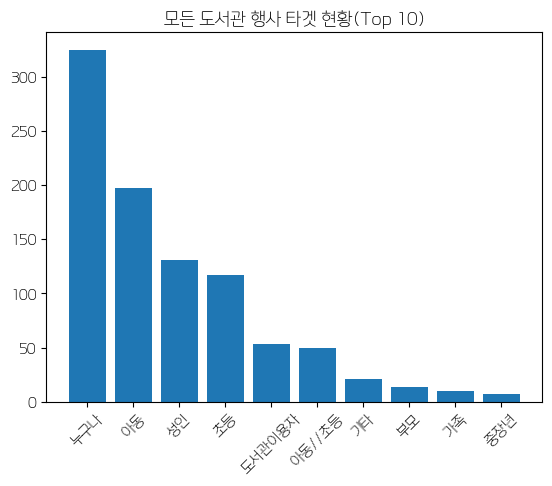

In [91]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='paybooc'
plt.rcParams['axes.unicode_minus'] =False

plt.bar(target_count['target_cate_adjusted'][:10],target_count['count'][:10])
plt.xticks(rotation=45)
plt.title("모든 도서관 행사 타겟 현황(Top 10)")

In [92]:
events_df['start_month'] = events_df['start_date'].apply(lambda x : "-".join(x.split("-")[:2]))
events_df['end_month'] = events_df['end_date'].apply(lambda x : "-".join(x.split("-")[:2]))
events_df[['start_month','end_month']]

,start_month,end_month
0,2024-07,2024-07
1,2024-07,2024-07
2,2024-07,2024-07
3,2024-07,2024-08
4,2024-07,2024-08
...,...,...
941,2021-03,2022-02
942,2021-03,2022-12
943,2021-03,2022-02
944,2021-03,2022-02


In [93]:
def column_viz(df,column,title='제목을 넣어주세요',threshold=10):
    temp = pd.DataFrame(df[column].value_counts())
    temp.reset_index(inplace=True)
    temp.columns = ['column','count']
    plt.bar(temp['column'][:threshold],temp['count'][:threshold])
    plt.xticks(rotation=45)
    plt.title(title)

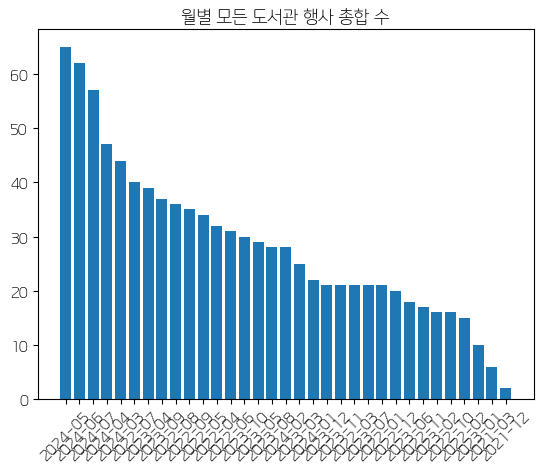

In [94]:

column_viz(events_df,'start_month','월별 모든 도서관 행사 총합 수',len(events_df['start_month'].unique()))

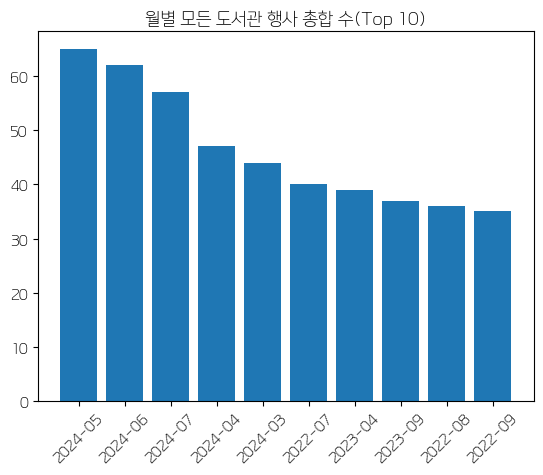

In [95]:
column_viz(events_df,'start_month','월별 모든 도서관 행사 총합 수(Top 10)')

In [96]:
mask = (events_df['lib_name_adjusted'] == "구립증산정보도서관") & (events_df['start_date'] >= '2023-01-01') & (events_df['start_date'] <= '2023-12-31')
lib_filtered = events_df[mask]
lib_filtered

,event_link,event_info,lib_name,events_num,events_place,events_period,events_time,events_target,events_price,events_q,events_dummies,start_date,end_date,target_category,num_category,target_cate_adjusted,num_category_adjusted,lib_name_adjusted,start_month,end_month
327,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 어린이 직업탐색 네 꿈을 찾아봐! 12월 - 인테리어 디자이너...,구립증산정보도서관,327,3층 어린이열람실,2023-12-27 ~ 2023-12-27,2023년 12월 27일(수) 오후 3시 ~ 5시,어린이 이용자 누구나 (24명),무료,02-307-6030,12월 어린이 직업탐색 네 꿈을 찾아봐! 인테리어 디자이너 \n\n매월 마지막 주...,2023-12-27,2023-12-27,누구나//어린이,2,아동,1,구립증산정보도서관,2023-12,2023-12
328,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 사서 선생님과 함께하는 [두근두근 크리스마스 준비!]\n202...,구립증산정보도서관,328,지하 1층 문화강좌실,2023-12-21 ~ 2023-12-21,2023.12.21.(목) 오후 4시~5시,4~5세 유아 10명 (부모 동반 가능),무료,02-307-6030,사서 선생님과 함께하는 두근두근 크리스마스 준비! \n\n코앞으로 다가온 크리스마...,2023-12-21,2023-12-21,유아//부모,2,아동,1,구립증산정보도서관,2023-12,2023-12
329,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 민들레씨 그림책 놀이터 [12/20(수) 멍멍댄스]\n2023...,구립증산정보도서관,329,지하 1층 문화강좌실,2023-12-20 ~ 2023-12-20,16:00,6~7세 유아 10명,무료,02-307-6030,민들레씨 그림책 놀이터 멍멍댄스 \n\n우리 도서관에서 진행 된 ＜은평마을 ...,2023-12-20,2023-12-20,유아,1,아동,1,구립증산정보도서관,2023-12,2023-12
330,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 민들레씨 그림책 놀이터 [12/19(화) 카멜레온의 친구 만들...,구립증산정보도서관,330,지하 1층 문화강좌실,2023-12-19 ~ 2023-12-19,16:00,초등 1~3학년 10명,무료,02-307-6030,민들레씨 그림책 놀이터 카멜레온의 친구 만들기 작전 \n\n우리 도서관에서 진행...,2023-12-19,2023-12-19,초등,1,초등,1,구립증산정보도서관,2023-12,2023-12
331,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 나만의 복실복실 모루인형 만들기\n2023-12-19 ~ 20...,구립증산정보도서관,331,3층 어린이열람실,2023-12-19 ~ 2023-12-19,23년 12월 19일(화) 오후 6시 ~ 재료 소진 시 까지,도서관 이용자 누구나,무료,02-307-6030,"개관시간 연장지원 사업 나만의 복실복실 모루인형 만들기 \n\n추운 겨울 밤, 여...",2023-12-19,2023-12-19,누구나,1,누구나,1,구립증산정보도서관,2023-12,2023-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 설날 맞이 전통 프로그램 새해 복 많이 받으세요!\n2023-...,구립증산정보도서관,613,지하 문화강좌실,2023-01-14 ~ 2023-01-14,오후 3시 ~ 4시,8~10세 유아 및 어린이 14명 (2023년 기준),무료,NaN,설날맞이 전통 프로그램 새해 복 많이 받으세요!\n사서 선생님과 함께 설날 그림책을...,2023-01-14,2023-01-14,유아//어린이,2,아동,2,구립증산정보도서관,2023-01,2023-01
614,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 제29회 겨울독서교실\n2023-01-09 ~ 2023-01-...,구립증산정보도서관,614,지하 문화강좌실,2023-01-09 ~ 2023-01-12,오후3시~5시,초등학생 3-4학년 20명 ※ 2012-2013년생,무료,NaN,제29회 겨울독서교실<내멋대로 도서관 탐험>\n\n대 상 초등학생 3-4학년 20명...,2023-01-09,2023-01-12,초등,1,초등,1,구립증산정보도서관,2023-01,2023-01
615,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 2023 1월 꼬마북클럽 '오늘 해님이 안나온다면'\n2023...,구립증산정보도서관,615,지하 문화강좌실,2023-01-09 ~ 2023-01-16,오후 4시,6~7세 유아 10명,무료,NaN,2023 1월 꼬마북클럽\n오늘 해님이 안 나온다면\n\n대상 _ 6~7세 유아 1...,2023-01-09,2023-01-16,유아,1,아동,1,구립증산정보도서관,2023-01,2023-01
618,https://culture.seoul.go.kr/culture/culture/cu...,[구립증산정보도서관] 인스타그램 이벤트 ‘독서할계묘’\n2023-01-02 ~ 20...,구립증산정보도서관,618,도서관 인스타그램,2023-01-02 ~ 2023-01-14,1월 2일(월) ~ 1월 14일(토),도서관 이용자 누구나,무료,NaN,인스타그램 1월 이벤트 \n\n”독서할계묘”\n2023년을 맞이하여 진행하는 독서 ...,2023-01-02,2023-01-14,누구나,1,누구나,1,구립증산정보도서관,2023-01,2023-01


In [97]:
lib_filtered.to_csv('./output_new/lib_jsplib.csv',index=False,encoding='utf-8-sig')

In [98]:
lib_filtered.columns

Index(['event_link', 'event_info', 'lib_name', 'events_num', 'events_place',
       'events_period', 'events_time', 'events_target', 'events_price',
       'events_q', 'events_dummies', 'start_date', 'end_date',
       'target_category', 'num_category', 'target_cate_adjusted',
       'num_category_adjusted', 'lib_name_adjusted', 'start_month',
       'end_month'],
      dtype='object')

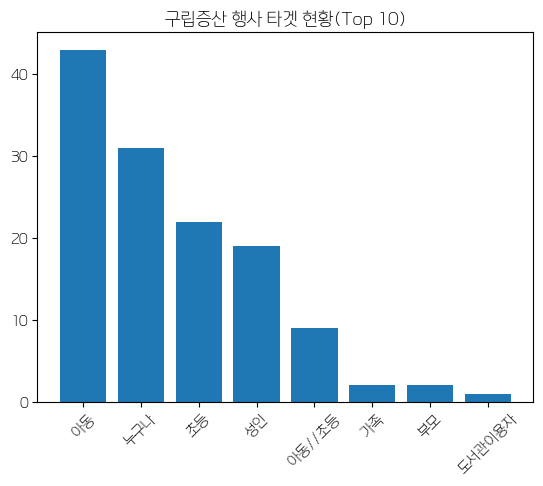

In [99]:
column_viz(lib_filtered,'target_cate_adjusted',"구립증산 행사 타겟 현황(Top 10)")

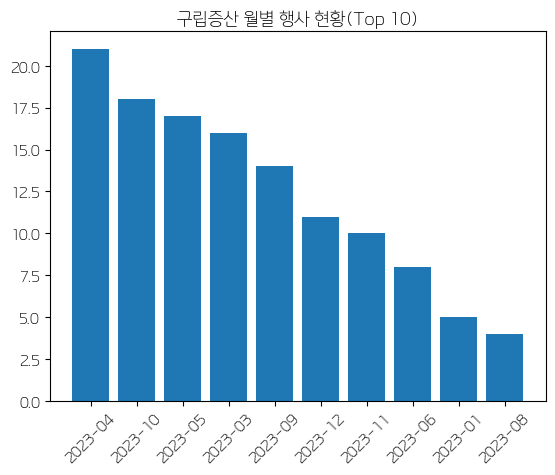

In [100]:
column_viz(lib_filtered,'start_month',"구립증산 월별 행사 현황(Top 10)")
